In [13]:
path_avg = '/nfshome/llayer/AIErrorLogAnalysis/experiments/AVG_20_encoded/'
path_rnn = '/nfshome/llayer/AIErrorLogAnalysis/experiments/VAR_DIM/'
path_rnn_att = '/nfshome/llayer/AIErrorLogAnalysis/experiments/VAR_DIM_Att/'
path_base = '/nfshome/llayer/AIErrorLogAnalysis/experiments_baseline/BASELINE_PRUNE_NEG/skopt.h5'

In [2]:
import pandas as pd
import glob
import json

In [3]:
base = pd.read_hdf(path_base)

In [4]:
base.head()

,call,learning_rate,dense_units,dense_layers,regulizer_value,dropout_value,batch_size,cv_score,std
0,24,0.003767,85,7,0.001624,0.063311,2521,0.831931,0.003715
1,0,0.005675,35,6,0.001000,0.052315,2000,0.829383,0.008777
2,16,0.004992,38,6,0.000208,0.277090,500,0.827555,0.004905
3,14,0.008565,65,7,0.000135,0.259290,2468,0.826332,0.006256
4,18,0.005742,100,8,0.000010,0.032497,3971,0.824065,0.003424


In [17]:
def read_json(path):
    params = []
    for eh  in  glob.glob(path+'*.json'):
        ehf = json.loads(open(eh).read())
        res = ehf['params']
        res['result'] = ehf['result']
        res['std'] = ehf['std_dv']
        params.append( res )
    results = pd.DataFrame(params)
    results = results.sort_values(by=['result'])
    return results

In [18]:
avg = read_json(path_avg)
rnn = read_json(path_rnn)
rnn_att = read_json(path_rnn_att)

In [23]:
rnn.head(50)

,learning_rate,dropout,rnn_units,dense_layers,dense_units,train_embedding,result,std
18,0.000026,0.020205,7.0,5.0,28.0,1.0,-0.803821,0.010304
2,0.000029,0.060160,6.0,5.0,49.0,1.0,-0.801401,0.005275
10,0.000014,0.005837,2.0,5.0,33.0,0.0,-0.797619,0.008485
4,0.000015,0.100000,3.0,5.0,50.0,0.0,-0.796325,0.009469
8,0.000010,0.007215,13.0,5.0,32.0,1.0,-0.795182,0.012676
7,0.000010,0.001000,2.0,5.0,50.0,1.0,-0.794213,0.004427
15,0.000023,0.050519,13.0,3.0,43.0,0.0,-0.793148,0.009323
17,0.000011,0.072677,19.0,4.0,44.0,0.0,-0.787797,0.009099
6,0.000011,0.001743,5.0,5.0,24.0,1.0,-0.786257,0.008755
16,0.000010,0.001000,20.0,5.0,10.0,0.0,-0.785683,0.013347


In [24]:
base_best, base_std = base['cv_score'].iloc[0], base['std'].iloc[1]
avg_best, avg_std = avg['result'].iloc[0], avg['std'].iloc[0]
rnn_best, rnn_std = rnn['result'].iloc[0], rnn['std'].iloc[0]
rnn_att_best, rnn_att_std = rnn_att['result'].iloc[0], rnn_att['std'].iloc[0]

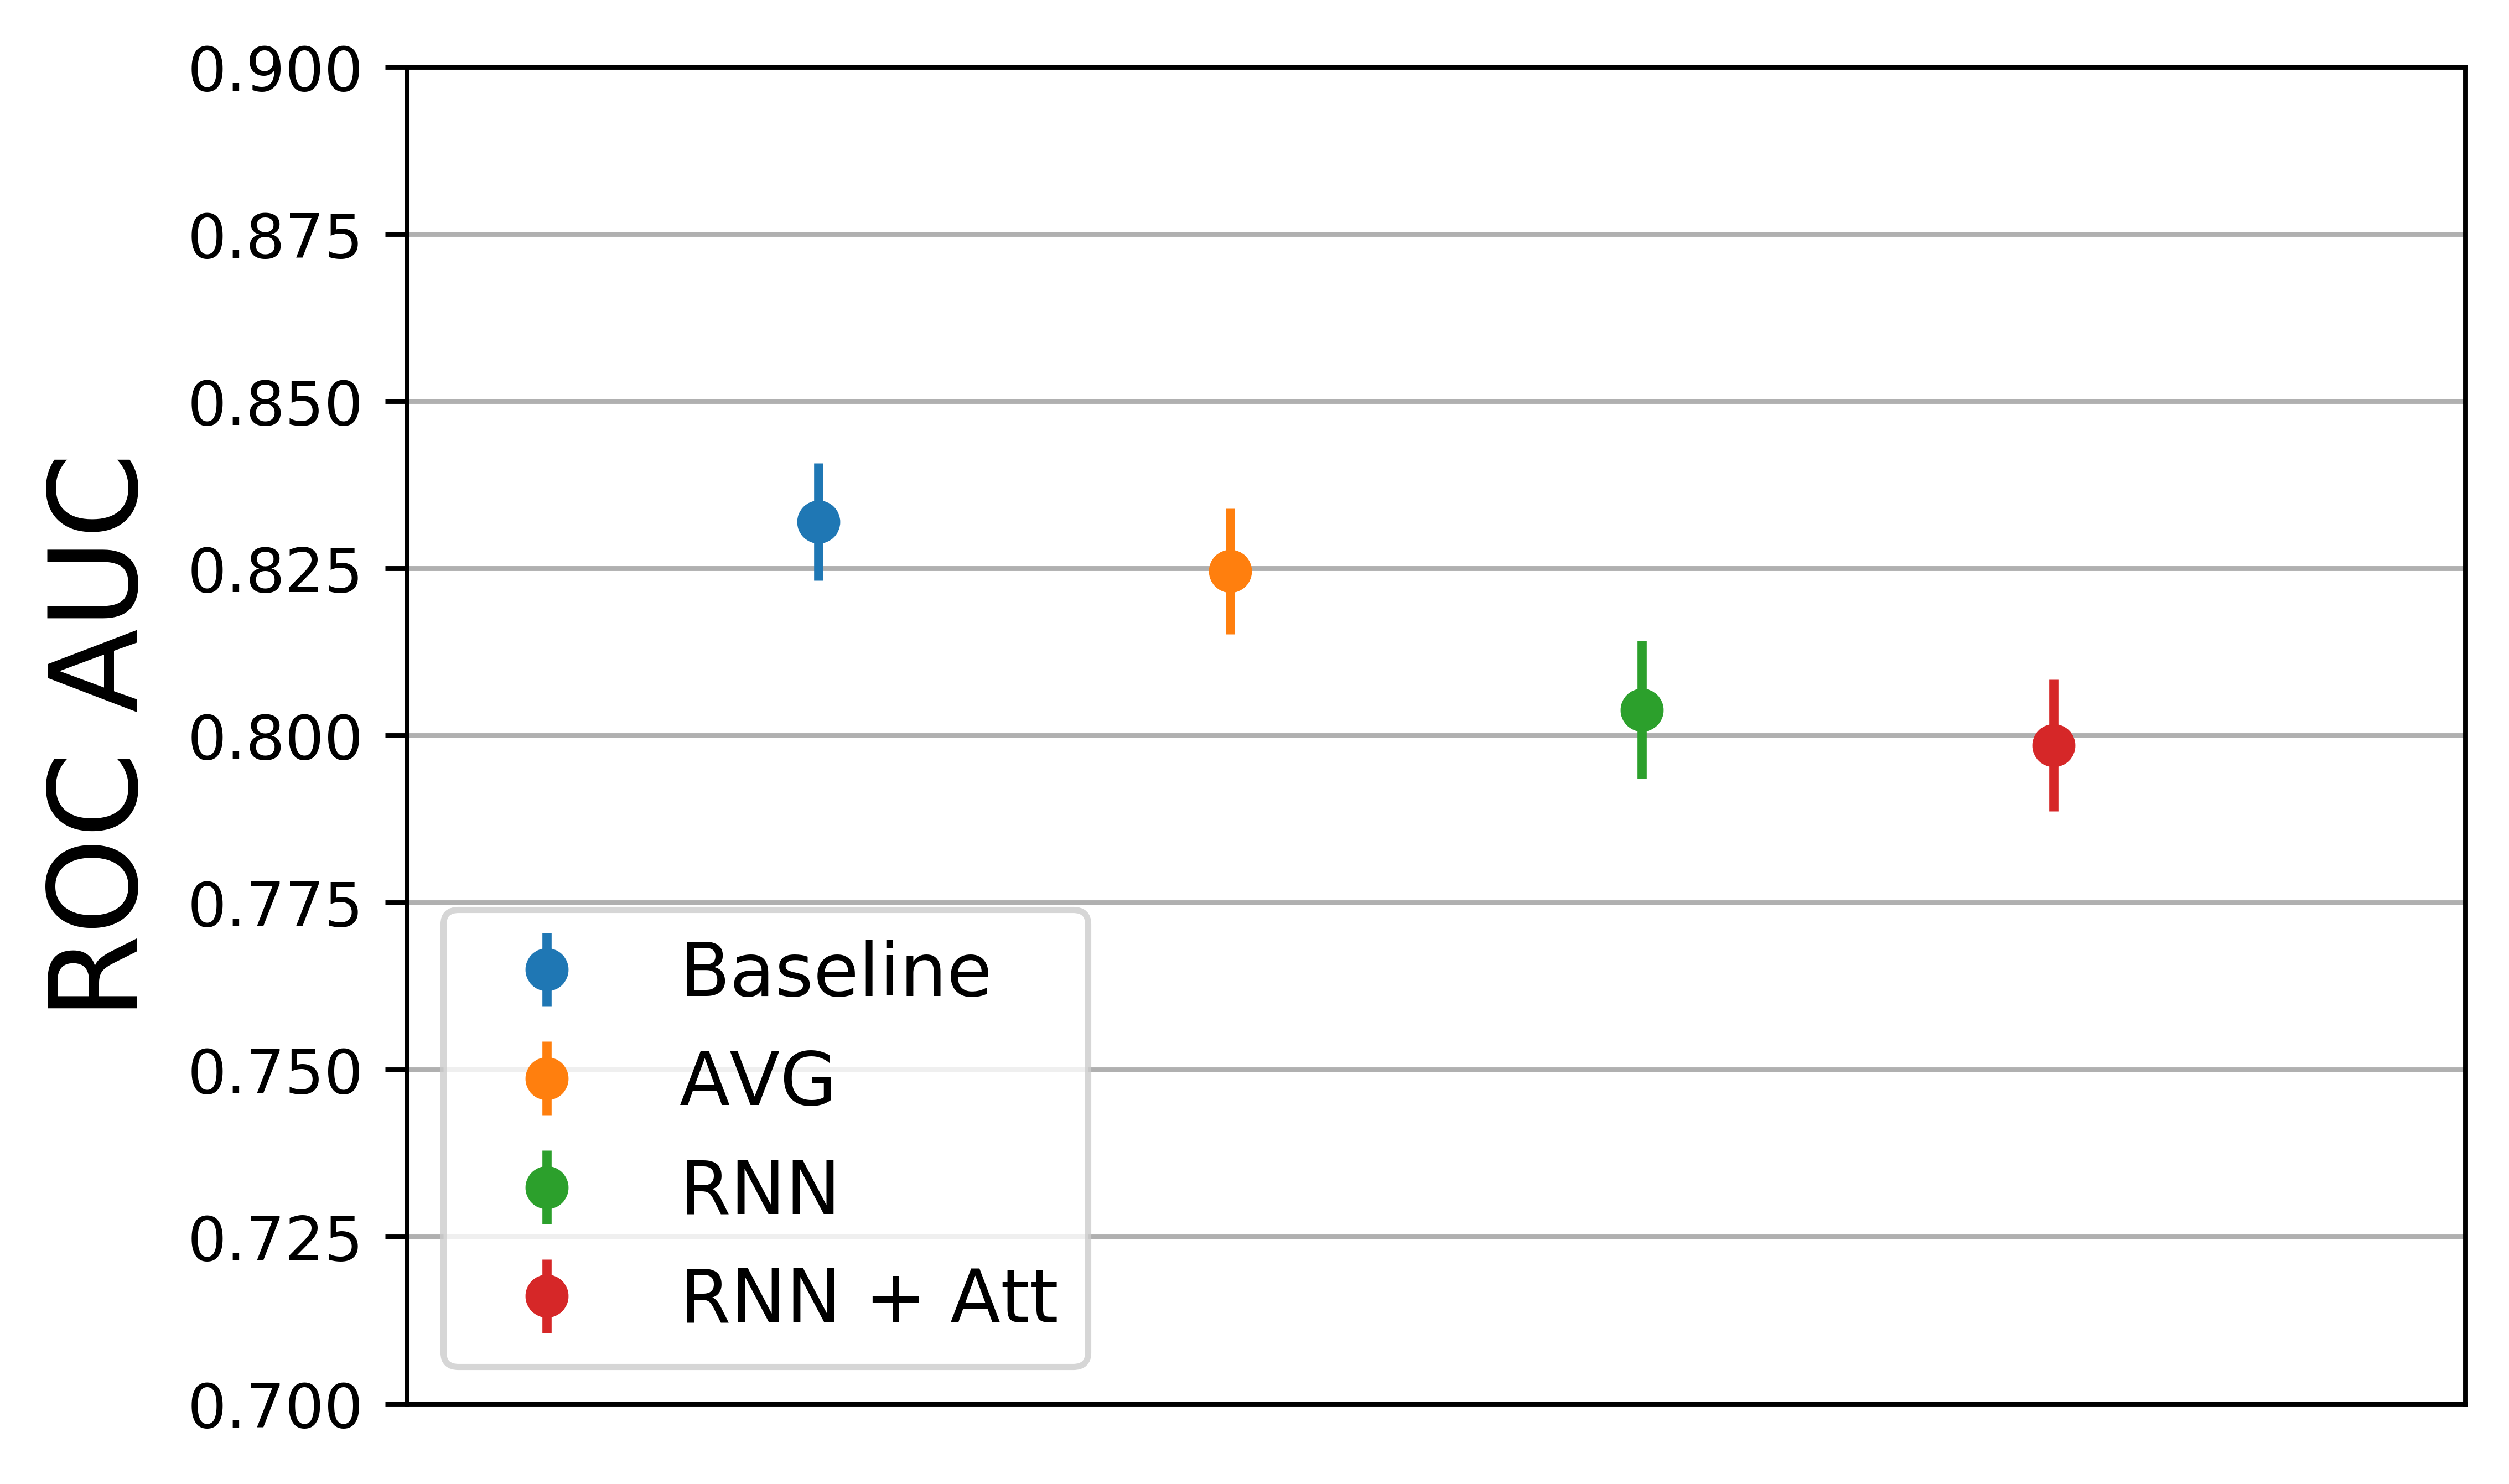

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4), dpi=800)
plt.errorbar(0, base_best , yerr=base_std , fmt = 'o', label = 'Baseline')
plt.errorbar(1, avg_best*-1 , yerr=avg_std , fmt = 'o', label = 'AVG')
plt.errorbar(2, rnn_best*-1 , yerr=rnn_std , fmt = 'o', label = 'RNN')
plt.errorbar(3, rnn_att_best*-1 , yerr=rnn_att_std , fmt = 'o', label = 'RNN + Att')
axes = plt.gca()
axes.set_xlim([-1,4])
axes.set_ylim([0.7,0.9])
plt.legend(loc='lower left', prop={'size': 12})
plt.ylabel('ROC AUC', fontsize=20)
plt.xticks([])
plt.gca().yaxis.grid(True)
plt.show()